# Enunciado

Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.

In [16]:
import pandas as pd

df = pd.read_csv('csv/data5.csv')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2.0
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2.0
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1.0
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0.0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0.0
...,...,...,...,...,...,...
995,0.334226,-0.021846,-0.427070,-0.198279,-0.423734,2.0
996,1.645415,0.398429,-1.485906,-1.221208,-0.561532,0.0
997,-1.597413,-1.878053,0.784759,0.485133,-0.636929,2.0
998,-0.010668,0.220133,0.078729,0.221473,-1.431986,1.0


## Correlaciones

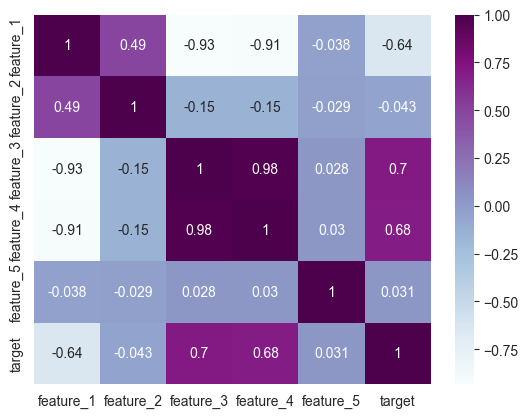

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.show()

## NaiveBayes

              precision    recall  f1-score   support

   feature_1       0.87      0.82      0.84       115
   feature_2       0.83      0.90      0.86       119
   feature_3       0.81      0.78      0.79        96

    accuracy                           0.84       330
   macro avg       0.84      0.83      0.83       330
weighted avg       0.84      0.84      0.84       330


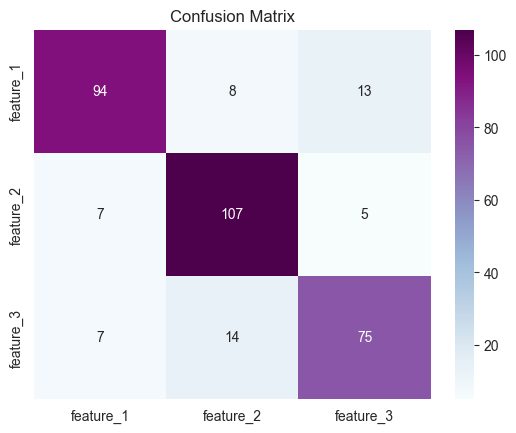

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Parametrización
X = df[['feature_1', 'feature_2', 'feature_3']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Creación y entrenamiento del modelo
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['feature_1', 'feature_2', 'feature_3']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
features = ['feature_1', 'feature_2', 'feature_3'] 
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='d', xticklabels=features, yticklabels=features)
plt.title('Confusion Matrix')
plt.show()

## KNN

max value: 0.8284 with 17 neighbors
max value: 0.8254 with 15 neighbors


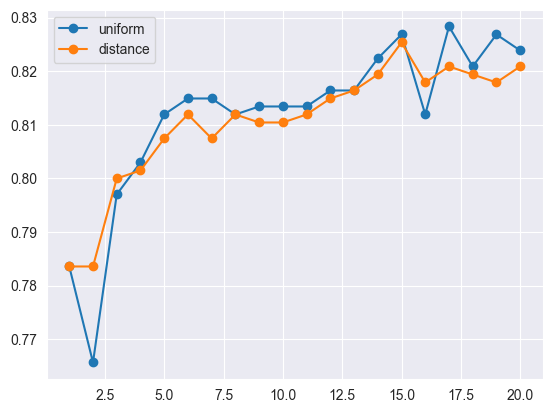

In [19]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection import KFold

MAX_NEIGHBORDS = 20
MIN_NEIGHBORDS = 1
N_SPLITS = 5

cv = KFold(n_splits = N_SPLITS, shuffle = False)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []

    for n_neighbors in range(MIN_NEIGHBORDS,MAX_NEIGHBORDS+1):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]

            # entrenamiento y ejecución del modelo
            knn.fit(X = f_train.drop(['target'], axis=1),
                            y = f_train['target'])
            y_pred = knn.predict(X = f_test.drop(['target'], axis = 1))

            # evaluación del modelo
            acc = accuracy_score(f_test['target'], y_pred)
            fold_accuracy.append(acc)

        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

    plt.plot(range(MIN_NEIGHBORDS,MAX_NEIGHBORDS+1), total_scores, marker='o', label=weights)
    print('max value: {:.4f} with {} neighbors'.format(max(total_scores), total_scores.index(max(total_scores))+1))
    
plt.legend()
plt.show()

In [20]:
n_neighbors = 3
weights = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)

# Entrenamiento y ejecución del modelo
knn.fit(X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.8181818181818182


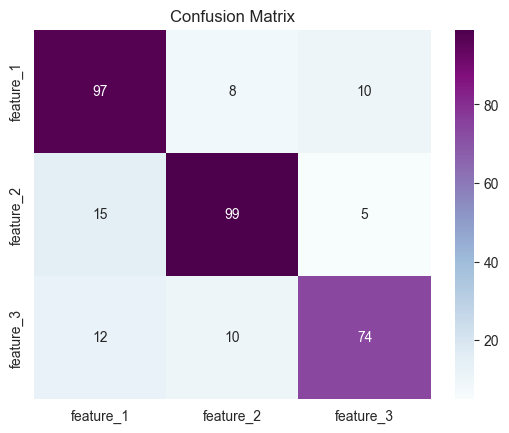

In [21]:
cm = confusion_matrix(y_test, y_pred)
features = ['feature_1', 'feature_2', 'feature_3']
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='d', xticklabels=features, yticklabels=features)
plt.title('Confusion Matrix')
plt.show()